In [12]:
import numpy as np
import pandas as pd
import spacy


In [13]:
# Reading the document
amazon = pd.read_csv('amazon_product_reviews.csv')

In [14]:
# Printing the first 5 rows of the document
amazon.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [15]:
# Making a separate list with only the data that is relevant for this exercise

cleaned = amazon[['reviews.text','reviews.title','reviews.username']]
cleaned

,reviews.text,reviews.title,reviews.username
0,I thought it would be as big as small paper bu...,Too small,llyyue
1,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi
2,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo
3,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry
4,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack
...,...,...,...
4995,This is a great tablet for the price. Amazon i...,Good product,litle
4996,This tablet is the perfect size and so easy to...,Great Tablet,gracie
4997,Purchased this for my son. Has room to upgrade...,Great for kids or smaller needs,Hawk
4998,I had some thoughts about getting this for a 5...,Very sturdy for a 5 year old,Mrbilly


In [16]:
# checking if we have empty spaces
cleaned.isnull().sum()

reviews.text         0
reviews.title       13
reviews.username     1
dtype: int64

In [17]:
# printing only the reviews
text = cleaned['reviews.text']
text

0       I thought it would be as big as small paper bu...
1       This kindle is light and easy to use especiall...
2       Didnt know how much i'd use a kindle so went f...
3       I am 100 happy with my purchase. I caught it o...
4       Solid entry level Kindle. Great for kids. Gift...
                              ...                        
4995    This is a great tablet for the price. Amazon i...
4996    This tablet is the perfect size and so easy to...
4997    Purchased this for my son. Has room to upgrade...
4998    I had some thoughts about getting this for a 5...
4999    this is a steal, have 8 gb model as well.This ...
Name: reviews.text, Length: 5000, dtype: object

In [18]:
# Cleaning the empty spaces
cleaned.dropna(inplace=True, axis=0)

C:\Users\Eliza\AppData\Local\Temp\ipykernel_19852\3129187197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned.dropna(inplace=True, axis=0)


In [19]:
# checking to see if we still have empty spaces
cleaned.isnull().sum()

reviews.text        0
reviews.title       0
reviews.username    0
dtype: int64

In [20]:
text = cleaned['reviews.text']
text.head()

0    I thought it would be as big as small paper bu...
1    This kindle is light and easy to use especiall...
2    Didnt know how much i'd use a kindle so went f...
3    I am 100 happy with my purchase. I caught it o...
4    Solid entry level Kindle. Great for kids. Gift...
Name: reviews.text, dtype: object

In [21]:
# Loading spacy

nlp = spacy.load('en_core_web_md')

# Creating a function that removes punctuation, stop words and makes all the words lower case.
def preprocess(text):
    
    doc = nlp(text.lower().strip())
    processed = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    
    return ' '.join(processed)

In [22]:
# Applying the function to our cleaned dataset
cleaned['processed.text']=cleaned['reviews.text'].apply(preprocess)

C:\Users\Eliza\AppData\Local\Temp\ipykernel_19852\3829470348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['processed.text']=cleaned['reviews.text'].apply(preprocess)


In [23]:
# Testing to see the results
cleaned['processed.text'].head()

0    think big small paper turn like palm think sma...
1               kindle light easy use especially beach
2    not know use kindle go low end m happy little ...
3    100 happy purchase catch sale good price norma...
4    solid entry level kindle great kid gift kid fr...
Name: processed.text, dtype: object

In [26]:
# Importing libraries 
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from collections import defaultdict

In [27]:
nlp = spacy.load('en_core_web_md')

# Initialize dictionaries to hold positive and negative words
positive_words = defaultdict(int)
negative_words = defaultdict(int)

In [28]:

# Determine the polarity and count the positive words and negative words. 

from textblob import TextBlob


positive_words = {}
negative_words = {}

for sentence in cleaned['processed.text']:

    doc = nlp(sentence)
    tokens = [token.lemma_.lower().strip() for token in doc if not token.is_stop and token.is_alpha]
    for token in tokens:
        blob = TextBlob(str(token))

        polarity = blob.sentiment.polarity
        
        if polarity > 0:
            if token.lower() not in positive_words:
                positive_words[token.lower()] = 1
            else:
                positive_words[token.lower()] += 1
        elif polarity < 0:
            if token.lower() not in negative_words:
                negative_words[token.lower()] = 1
            else:
                negative_words[token.lower()] += 1


In [29]:
# Testing the model code on sample product reviews. I chose row 13 here.
cleaned.loc[13, 'processed.text'] 

'kindle convenient size lettering easy read'

In [30]:
# Testing the model code on sample product reviews. I chose row 13 here.
# Access the review text from the DataFrame
specific_review = cleaned.loc[13, 'processed.text'] 

# Initialize a TextBlob object with the review text
blob = TextBlob(specific_review)

# Access the polarity attribute to get the polarity score
polarity = blob.sentiment.polarity

print("Review:", specific_review)
print("Polarity Score:", polarity)

Review: kindle convenient size lettering easy read
Polarity Score: 0.43333333333333335


In [31]:
# Create word clouds
pos_wordcloud = WordCloud(width=400, height=200, background_color ='white').generate_from_frequencies(positive_words)
neg_wordcloud = WordCloud(width=400, height=200, background_color ='white').generate_from_frequencies(negative_words)


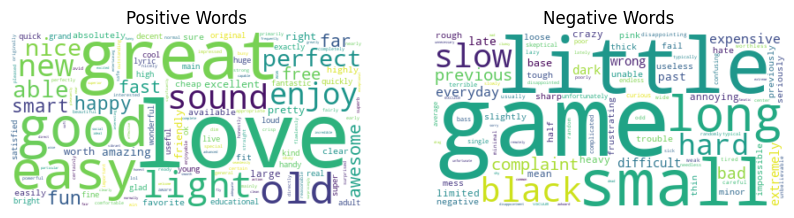

In [33]:
# Show word clouds

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(pos_wordcloud, interpolation='bilinear')
ax[0].set_title('Positive Words')
ax[0].axis('off')

ax[1].imshow(neg_wordcloud, interpolation='bilinear')
ax[1].set_title('Negative Words')
ax[1].axis('off')

plt.show()